# EDA del dataset 'Accesos por Tecnología'

## Librerías

### Librerías nativas

In [1]:
import warnings
import os

### Librerías instaladas

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Ignorar warnings

In [3]:
warnings.filterwarnings('ignore')

## Extracción del dataset

Ruta actual.

In [4]:
ruta_actual = os.getcwd()

ruta_actual

'c:\\Users\\franc\\Desktop\\Proyecto Individual n°2 Telecomunicaciones\\notebooks'

Ruta raíz del proyecto.

In [5]:
ruta_del_proyecto = os.path.dirname(
    ruta_actual
    )

ruta_del_proyecto

'c:\\Users\\franc\\Desktop\\Proyecto Individual n°2 Telecomunicaciones'

Ruta del dataset a extraer.

In [6]:
ruta_del_dataset = os.path.join(
    ruta_del_proyecto, 
    'data', 
    'accesos_por_tecnologia.parquet'
    )

ruta_del_dataset

'c:\\Users\\franc\\Desktop\\Proyecto Individual n°2 Telecomunicaciones\\data\\accesos_por_tecnologia.parquet'

Se extrae el dataset.

In [7]:
accesos_por_tecnologia = pd.read_parquet(
    ruta_del_dataset, 
    engine='fastparquet'
    )

## Exploración del dataset

In [8]:
accesos_por_tecnologia

,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total
0,2024.0,2.0,Buenos Aires,214055.0,2722466.0,1849476.0,138638.0,64745.0,4989380.0
1,2024.0,2.0,Capital Federal,54102.0,1144781.0,230402.0,4493.0,29821.0,1463599.0
2,2024.0,2.0,Catamarca,4951.0,10303.0,58355.0,1384.0,81.0,75074.0
3,2024.0,2.0,Chaco,9448.0,57935.0,68944.0,8407.0,2358.0,147092.0
4,2024.0,2.0,Chubut,25955.0,80704.0,26516.0,31118.0,9930.0,174223.0
...,...,...,...,...,...,...,...,...,...
931,2014.0,1.0,Santa Fe,322662.0,174296.0,3059.0,5951.0,644.0,506612.0
932,2014.0,1.0,Santiago Del Estero,32567.0,3598.0,19.0,915.0,34.0,37133.0
933,2014.0,1.0,Tierra Del Fuego,21618.0,2837.0,648.0,1.0,2934.0,28038.0
934,2014.0,1.0,Tucumán,129717.0,83.0,121.0,13.0,98.0,130032.0


In [9]:
accesos_por_tecnologia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 936 entries, 0 to 935
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Año           935 non-null    float64
 1   Trimestre     935 non-null    float64
 2   Provincia     935 non-null    object 
 3   ADSL          935 non-null    float64
 4   Cablemodem    935 non-null    float64
 5   Fibra óptica  935 non-null    float64
 6   Wireless      935 non-null    float64
 7   Otros         935 non-null    float64
 8   Total         935 non-null    float64
dtypes: float64(8), object(1)
memory usage: 65.9+ KB


Sin duplicados.

In [10]:
accesos_por_tecnologia.duplicated(
    subset=['Año', 'Trimestre', 'Provincia']
    ).sum()

np.int64(0)

Hay nulos.

In [11]:
accesos_por_tecnologia[
    accesos_por_tecnologia.isna().any(axis=1)
    ]

,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total
935,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN


Se eliminan los nulos.

In [12]:
accesos_por_tecnologia.dropna(inplace=True)

In [13]:
accesos_por_tecnologia.isnull().sum()

Año             0
Trimestre       0
Provincia       0
ADSL            0
Cablemodem      0
Fibra óptica    0
Wireless        0
Otros           0
Total           0
dtype: int64

## Accesos por Tecnología a lo largo de los años

Se agrupa por los años las columnas de las tecnologías y el total.

In [14]:
años = accesos_por_tecnologia.groupby('Año')[
    ['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros', 'Total']
    ].mean().reset_index()

años

,Año,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total
0,2014.0,155049.479167,103907.156250,6300.645833,3179.520833,2986.458333,271423.260417
1,2015.0,157455.145833,116280.947917,6467.468750,3452.406250,2529.645833,286185.614583
2,2016.0,157018.895833,126844.666667,7084.656250,3514.541667,2371.177083,296833.937500
3,2017.0,152492.729167,147375.656250,7982.416667,4508.791667,3585.020833,315944.614583
4,2018.0,145645.666667,172617.416667,11240.875000,9062.989583,4851.666667,343418.614583
5,2019.0,100607.291667,203494.541667,39220.625000,14172.666667,8887.416667,366382.541667
6,2020.0,94508.625000,213957.958333,48298.125000,16289.718750,9979.354167,383033.781250
7,2021.0,81271.291667,238302.187500,67432.354167,20073.312500,10487.427083,417566.572917
8,2022.0,59502.322917,251271.531250,113280.562500,23251.416667,9797.656250,457103.489583
9,2023.0,41095.947917,250428.072917,149211.458333,24225.687500,8459.260417,473420.427083


In [15]:
años.drop(10, inplace=True)

In [16]:
años

,Año,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total
0,2014.0,155049.479167,103907.156250,6300.645833,3179.520833,2986.458333,271423.260417
1,2015.0,157455.145833,116280.947917,6467.468750,3452.406250,2529.645833,286185.614583
2,2016.0,157018.895833,126844.666667,7084.656250,3514.541667,2371.177083,296833.937500
3,2017.0,152492.729167,147375.656250,7982.416667,4508.791667,3585.020833,315944.614583
4,2018.0,145645.666667,172617.416667,11240.875000,9062.989583,4851.666667,343418.614583
5,2019.0,100607.291667,203494.541667,39220.625000,14172.666667,8887.416667,366382.541667
6,2020.0,94508.625000,213957.958333,48298.125000,16289.718750,9979.354167,383033.781250
7,2021.0,81271.291667,238302.187500,67432.354167,20073.312500,10487.427083,417566.572917
8,2022.0,59502.322917,251271.531250,113280.562500,23251.416667,9797.656250,457103.489583
9,2023.0,41095.947917,250428.072917,149211.458333,24225.687500,8459.260417,473420.427083


Se crea un dataframe de formato largo.

In [17]:
df_melted = pd.melt(
    años, 
    id_vars='Año', 
    value_vars=['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros', 'Total'], 
    var_name='Tecnologia', 
    value_name='Accesos'
    )


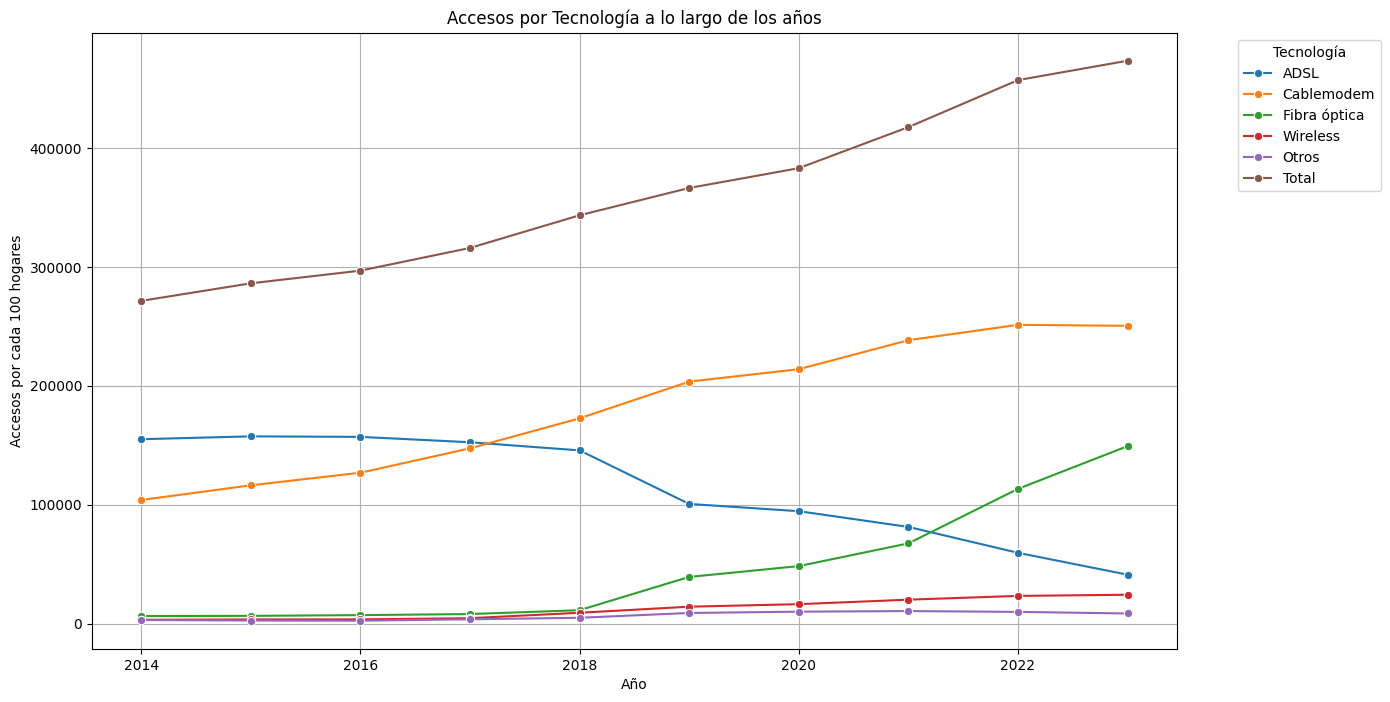

In [18]:
plt.figure(figsize=(14, 8))
sns.lineplot(data=df_melted, x='Año', y='Accesos', hue='Tecnologia', marker='o')
plt.title('Accesos por Tecnología a lo largo de los años')
plt.xlabel('Año')
plt.ylabel('Accesos por cada 100 hogares')
plt.legend(title='Tecnología', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

### Análisis del gráfico

El crecimiento total es constante. La tecnología dominante en el 2023 es el Cablemódem, que esta en una meseta. En segundo lugar la fibra óptica que tiene una tendencia alcista. Mientras que en tercer lugar esta el ADSL cuya tendencia es seguir cayendo en los próximo años. El wireless, en 10 años, siempre se mantuvo bajo aunque últimamente está creciendo de a poco.

En el año 2014 la tecnología dominante era la ADSL. En 2018 fue desbancada por la tecnología Cablemódem. A partir de ahí, comenzo la debacle de la ADSL.

Mi recomendación es concentrar la inversión en la fibra óptica. Esto es porque, de mantenerse la tendencia, esta tecnología superará al cablemódem.